## Linear Regression from scratch

The goal of this exercise is to implement the linear regression algorithm. 
The dataset is about predicting salary given gpa and years of experience. 
The steps to implement are as follows.  

1.	Read the data from a file (gpa_year_experience.csv)
2.	Scale the attributes
3.	Compute the error at each iteration and save the error values in vector
4.	Plot the error vector as a curve in the end
5.	Predict a new instance.
6.  Compare with SGDRegressor
7.  Create polynomial features and predict new instance   

In [11]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# load data and show first 5 rows
data = pd.read_csv('https://raw.githubusercontent.com/thomouvic/SENG474/main/data/gpa_years_experience.csv')
print(data.loc[data["gpa"] == 70 ,'years_of_experience'])
print(data)
data.head()

0     1.0
3     2.5
9     3.7
21    8.0
Name: years_of_experience, dtype: float64
    gpa  years_of_experience  salary
0    70                  1.0      50
1    80                  2.0      55
2    65                  2.0      45
3    70                  2.5      60
4    65                  2.7      58
5    80                  3.0      60
6    90                  3.0      65
7    92                  3.2      67
8    60                  3.5      55
9    70                  3.7      60
10   76                  4.0      65
11   85                  4.5      70
12   80                  5.0      78
13   60                  5.5      75
14   64                  5.8      78
15   60                  6.0      70
16   87                  6.0      80
17   90                  6.5      82
18   75                  7.0      75
19   80                  7.0      85
20   75                  7.5      80
21   70                  8.0      82
22   80                  8.5      85
23   90                  8.7  

,gpa,years_of_experience,salary
0,70,1.0,50
1,80,2.0,55
2,65,2.0,45
3,70,2.5,60
4,65,2.7,58


In [13]:
# prepare data, split columns into X and y
# X should be a numpy array of shape (m, n), use .values to convert from dataframe to numpy array
# y should be a numpy array of shape (m,), use .values to convert from dataframe to numpy array
Y = data['salary']
X = data.drop('salary', axis=1)
X = np.array(X)
Y = np.array(Y)

In [14]:
# extract m and n from X using X.shape[0] to get m and X.shape[1] to get n
m = X.shape[0]
n = X.shape[1]
print("m =",  m)
print("n =",  n)

m = 25
n = 2


In [15]:
# y should be a numpy array of shape (m, 1), use reshape(m, 1) to reshape y from (m,) to (m, 1)
Y = Y.reshape(25, 1)
print("Shape is =",  Y.shape)

Shape is = (25, 1)


In [16]:
# normalize X using min-max scaler (sklearn.preprocessing.MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model=scaler.fit(X)
X=model.transform(X)
X

array([[0.3125 , 0.     ],
       [0.625  , 0.125  ],
       [0.15625, 0.125  ],
       [0.3125 , 0.1875 ],
       [0.15625, 0.2125 ],
       [0.625  , 0.25   ],
       [0.9375 , 0.25   ],
       [1.     , 0.275  ],
       [0.     , 0.3125 ],
       [0.3125 , 0.3375 ],
       [0.5    , 0.375  ],
       [0.78125, 0.4375 ],
       [0.625  , 0.5    ],
       [0.     , 0.5625 ],
       [0.125  , 0.6    ],
       [0.     , 0.625  ],
       [0.84375, 0.625  ],
       [0.9375 , 0.6875 ],
       [0.46875, 0.75   ],
       [0.625  , 0.75   ],
       [0.46875, 0.8125 ],
       [0.3125 , 0.875  ],
       [0.625  , 0.9375 ],
       [0.9375 , 0.9625 ],
       [0.78125, 1.     ]])

In [17]:
# add dummy feature to X using scikit-learn dummy feature (sklearn.preprocessing.add_dummy_feature)
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)
xOG = X
X = X_b

In [18]:
# print shapes of X and y
# X should be (m, n+1) and y should be (m, 1)
print("X shape =",  X.shape)
print("Y shape =",  Y.shape)

X shape = (25, 3)
Y shape = (25, 1)


Errors list: [48.10880439631, 33.34520971063439, 23.129875237624656, 16.06125939523344, 11.169710465754, 8.06769645835734, 6.5142122115510235, 5.534994441498286, 5.051807532134994, 4.760259366972317]


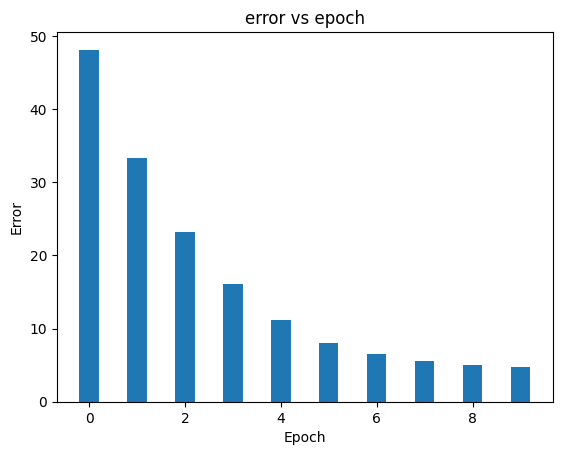

array([[44.69694899],
       [21.26803414],
       [25.80208124]])

In [19]:
eta = 0.1 # learning rate
n_epochs = 10
np.random.seed(42) # set random seed to 42 for reproducibility

# create theta, of shape (n+1, 1) and initialize it to random values using np.random.randn
theta = np.random.randn(n+1, 1) # randomly initialized model parameters

E = [] # list to store errors at each epoch
EpochList = []
# compute error for initial theta and append to E

# loop over n_epochs
# for each epoch: compute gradients, update theta, compute error, append error to E
m = len(X_b) # number of instances



for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - Y)
  theta = theta - eta * gradients
  y_predict = X_b @ theta

  # e = Y - y_predict
  e = [abs(Y[num] - y_predict[num]) for num in range(len(Y))]
  t =sum(e) / len(e)
  E.append(t[0])
  EpochList.append(epoch)

print("Errors list:", E)

# plot error vs epoch
# creating the bar plot
plt.bar(EpochList, E,
        width = 0.4)
 
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("error vs epoch")
plt.show()

# print final theta
theta

In [24]:
# let's predict the salary for a person who has gpa=70 and years_of_experience=3. 
# create a numpy array x of shape (1, 2) with these values
# scale features using the same scaler we used earlier
# insert dummy feature using dummy feature function
# Predict salary of x
x = np.array([[70,3]])
# scaler2 = MinMaxScaler()
# model2=scaler2.fit(x)
x=model.transform(x)
x_b = add_dummy_feature(x)
y_predict = x_b @ theta
y_predict

array([[57.79372996]])

In [25]:
# Let's compare with scikit-learn's SGDRegressor
# use SGDRegressor from scikit-learn to fit the data
# use max_iter=1000, eta0=0.1, random_state=42
from sklearn.linear_model import SGDRegressor
sgdReg = SGDRegressor(max_iter=1000, eta0=0.1, random_state=42)
sgdReg.fit(xOG, Y)

SGDRegressor(eta0=0.1, random_state=42)

In [26]:
# predict salary of x using sgd
sgdReg.predict(x)

array([59.34627065])

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# create polynomial features of degree 2 using scikit-learn PolynomialFeatures
poly = PolynomialFeatures(degree=2)
# create X_poly using fit_transform
X_poly = poly.fit_transform(xOG)
# create x_poly using transform
x_poly = poly.transform(x)
# fit the data using SGDRegressor
sgdReg.fit(X_poly, Y)
# predict salary of x using sgd
sgdReg.predict(x_poly)

array([59.78935119])